# Complex Bayesian Network notebook

#### Import dependencies

In [122]:
# Import dependencies
%pip install pgmpy
%pip install tabulate
%pip install pandas
%pip install networkx
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


#### Load libraries

In [123]:
# Load libraries
import pgmpy as pg
import tabulate as tb
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sklearn

## Data import and cleaning

#### Import BigPerf data

In [124]:
# Import data
df = pd.read_csv("C:\\Users\\Keir McGlinn-Shaw\\Documents\\Stage-3\\Dissertation\\Data\\Use\\BigPerfMetrics.csv")

df.head()

,Block_ID,HDFS_BW,HDFSTranmissionTime,Mapper_ID,Mapper_VM_MIPS,MapExecutionTime,MapperBW,MapperTransmissionTime,Reducer_ID,Reducer_VM_MIPS,ReducerExecutionTime,ReducerBW,ReducerTransmissionTime,Block_ID.1,Block_BW,BlockTransmissionTime,TransactionTime
0,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,30.00,2.53,reducer0,341739,480,3.80,250.14,reducer0_Block_1,0.0,0.00,1578.79
1,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,30.00,2.53,reducer1,150000,120,50.00,18.99,reducer1_Block_1,50.0,20.00,1007.64
2,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,16.76,3.25,reducer2,382530,480,4.48,212.22,reducer2_Block_1,3.7,270.02,1811.61
3,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,16.76,3.25,reducer3,150000,120,5.88,161.57,reducer3_Block_1,3.7,270.02,1400.96
4,HDFS_Block_208,11.81,80.63,mapper207,652289,765.49,18.41,4.16,reducer4,457419,480,5.88,161.53,reducer4_Block_1,3.7,270.02,1761.83


#### Clean data of unwanted variables and missing values

In [125]:
# Clean data
df.dropna()

df.drop(labels=['Block_ID', 'Mapper_ID', 'Reducer_ID', 'Block_ID.1'], axis=1, inplace=True)

df.head()

,HDFS_BW,HDFSTranmissionTime,Mapper_VM_MIPS,MapExecutionTime,MapperBW,MapperTransmissionTime,Reducer_VM_MIPS,ReducerExecutionTime,ReducerBW,ReducerTransmissionTime,Block_BW,BlockTransmissionTime,TransactionTime
0,11.81,80.63,652289,765.49,30.00,2.53,341739,480,3.80,250.14,0.0,0.00,1578.79
1,11.81,80.63,652289,765.49,30.00,2.53,150000,120,50.00,18.99,50.0,20.00,1007.64
2,11.81,80.63,652289,765.49,16.76,3.25,382530,480,4.48,212.22,3.7,270.02,1811.61
3,11.81,80.63,652289,765.49,16.76,3.25,150000,120,5.88,161.57,3.7,270.02,1400.96
4,11.81,80.63,652289,765.49,18.41,4.16,457419,480,5.88,161.53,3.7,270.02,1761.83


#### Rename columns to better fit in drawn charts and for ease of use

In [126]:
# Rename column headers to abbreviations

nodes = ['HBW', 'HTT', 'MMIPS', 'MET', 'MBW', 'MTT', 'RMIPS', 'RET', 'RBW', 'RTT', 'BBW', 'BTT', 'TT']

df.columns = nodes

df.head(10)

,HBW,HTT,MMIPS,MET,MBW,MTT,RMIPS,RET,RBW,RTT,BBW,BTT,TT
0,11.81,80.63,652289,765.49,30.00,2.53,341739,480,3.80,250.14,0.0,0.00,1578.79
1,11.81,80.63,652289,765.49,30.00,2.53,150000,120,50.00,18.99,50.0,20.00,1007.64
2,11.81,80.63,652289,765.49,16.76,3.25,382530,480,4.48,212.22,3.7,270.02,1811.61
3,11.81,80.63,652289,765.49,16.76,3.25,150000,120,5.88,161.57,3.7,270.02,1400.96
4,11.81,80.63,652289,765.49,18.41,4.16,457419,480,5.88,161.53,3.7,270.02,1761.83
5,11.81,80.63,652289,765.49,18.41,4.16,150000,120,6.98,136.24,3.7,270.02,1376.54
6,11.81,80.63,652289,765.49,18.41,4.16,563904,480,3.80,250.14,3.7,270.02,1850.44
7,11.81,80.63,652289,765.49,18.41,4.16,150000,120,150.00,6.33,3.7,270.02,1246.63
8,11.81,80.63,652289,765.49,18.41,4.16,430890,480,3.80,250.14,3.7,270.02,1850.44
9,11.81,80.63,652289,765.49,18.41,4.16,150000,120,150.00,6.33,3.7,270.02,1246.63


#### Define funtion to discretise data into three catagories

In [127]:
# '''
# Splits data into three bins of equal size using: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# '''
def split_tertiles(df):
    tertile_labels = ['Very Low', 'Low', 'High', 'Very-high']

    tert_df = pd.DataFrame()

    final_df = pd.DataFrame()

    for column_name in df:
        tert_df[column_name] = pd.qcut(x=df[column_name], q=4, duplicates='drop')

        if len(tert_df[column_name].cat.categories) == 4:
            final_df[column_name] = tert_df[column_name].cat.rename_categories(['Very Low', 'Low', 'High', 'Very-high'])
        elif len(tert_df[column_name].cat.categories) == 3:
            final_df[column_name] = tert_df[column_name].cat.rename_categories(['Low', 'Medium', 'High'])
        elif len(tert_df[column_name].cat.categories) == 2:
            final_df[column_name] = tert_df[column_name].cat.rename_categories(['Low', 'High'])
        else:
            final_df[column_name] = pd.cut(df[column_name], 2, labels=['Very Low', 'Very-high'], ordered=True)

    # Change type of values stored in dataframe to avoid errors arrising from using the Category type when the dataframe is fed into the pgmpy.metrics.metrics correlation_score function
    final_df = final_df.astype('object')

    return final_df

# import random

# '''
# Splits data into three bins of equal size using: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# '''
# def split_tertiles(df):
#     tertile_labels = ['Very Low', 'Low', 'High', 'Very-high']

#     tert_df = pd.DataFrame()

#     # for column in df:
#     #   for i in range(len(column)):
#     #     df[column][i] = df[column][i] + random.uniform(0.00000000001, 0.000009)

#     # for (columnName, columnData) in df.iteritems():
#     #   for val in columnData:
#     #     val = val + random.uniform(0.000000001, 0.000000009)

#     for column_name in df:

#           tert_df[column_name], bins = pd.qcut(x=df[column_name], q=4, duplicates='drop', retbins=True)

#           print(column_name)
#           for i in range(len(bins)):
#             print (bins[i])


#     # Change type of values stored in dataframe to avoid errors arrising from using the Category type when the dataframe is fed into the pgmpy.metrics.metrics correlation_score function
#     tert_df = tert_df.astype('object')

#     return tert_df

'''
Splits data into three bins of equal size using: https://pandas.pydata.org/docs/reference/api/pandas.cut.html
'''
# def split_tertiles(df):
#     tertile_labels = ['Very Low', 'Low', 'High', 'Very High']

#     tert_df = pd.DataFrame()

#     for column_name in df:
#         tert_df[column_name] = pd.cut(df[column_name], 4, labels=tertile_labels, ordered=True)

#     # Change type of values stored in dataframe to avoid errors arrising from using the Category type when the dataframe is fed into the pgmpy.metrics.metrics correlation_score function
#     tert_df = tert_df.astype('object')

#     return tert_df

'\nSplits data into three bins of equal size using: https://pandas.pydata.org/docs/reference/api/pandas.cut.html\n'

In [128]:
# def discretise(df):
#     labels = ['1', '2', '3', '4']

#     tert_df = pd.DataFrame()

#     for column_name in df:
#         tert_df[column_name], bins = pd.cut(df[column_name], 4, labels=labels, ordered=True, retbins=True)

#         print(column_name)
#         print(bins[0])
#         print(bins[1])
#         print(bins[2])
#         print(bins[3])
#         print(bins[4])

#         tert_df[column_name] = tert_df[column_name].cat.rename_categories([ f'1. ({str(round(bins[0]))} to {str(round(bins[1]))}]',
#                                                                            f'2. ({str(round(bins[1]))} to {str(round(bins[2]))}]',
#                                                                            f'3. ({str(round(bins[2]))} to {str(round(bins[3]))}]',
#                                                                            f'4. ({str(round(bins[3]))} to {str(round(bins[4]))}]'])

#     # Change type of values stored in dataframe to avoid errors arrising from using the Category type when the dataframe is fed into the pgmpy.metrics.metrics correlation_score function
#     tert_df = tert_df.astype('object')

#     return tert_df

def discretise(df):
    discrete_df = pd.DataFrame()

    # discrete_df['HBW'] = pd.cut(df['HBW'], 4, labels=['1. less than 6 Mbps', '2. greater than 6 Mbps'], ordered=True, retbins=False)
    # discrete_df['HTT'] = pd.cut(df['HTT'], 4, labels=['1. less than 178 Milliseconds', '2. greater than 178 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['MMIPS'] = pd.cut(df['MMIPS'], 4, labels=['1. less than 750000 MIPS', '2. 750000 to 850000 MIPS', '3. greater than 850000 MIPS'], ordered=True, retbins=False)
    # discrete_df['MET'] = pd.cut(df['MET'], 4, labels=['1. less than 1000 Milliseconds', '2. 1000 to 1250 Milliseconds', '3. greater than 1250 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['MBW'] = pd.cut(df['MBW'], 4, labels=['1. less than 11 Mbps', '2. 11 to 20 Mbps', '3. greater than 20 Mbps'], ordered=True, retbins=False)
    # discrete_df['MTT'] = pd.cut(df['MTT'], 4, labels=['1. less than 18 Milliseconds', '2. 18 to 35 Milliseconds', '3. greater than 35 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['RMIPS'] = pd.cut(df['RMIPS'], 4, labels=['1. less than 285000 MIPS', '2. 285000 to 425000 MIPS', '3. greater than 425000 MIPS'], ordered=True, retbins=False)
    # discrete_df['RET'] = pd.cut(df['RET'], 4, labels=['1. less than 240 Milliseconds', '2. greater than 240 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['RBW'] = pd.cut(df['RBW'], 4, labels=['1. less than 75 Mbps', '2. greater than 75 Mbps'], ordered=True, retbins=False)
    # discrete_df['RTT' ] = pd.cut(df['RTT'], 4, labels=['1. less than 90 Milliseconds', '2. 90 to 170 Milliseconds', '3. greater than 170 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['BBW'] = pd.cut(df['BBW'], 4, labels=['1. less than 25 Mbps', '2. greater than 25 Mbps'], ordered=True, retbins=False)
    # discrete_df['BTT'] = pd.cut(df['BTT'], 4, labels=['1. less than 135 Milliseconds', '2. greater than 135 Milliseconds'], ordered=True, retbins=False)
    # discrete_df['TT'] = pd.cut(df['TT'], 4, labels=['1. less than 1625 Milliseconds', '2. 1625 to 2245 Milliseconds', '3. greater than 2245 Millilseconds'], ordered=True, retbins=False)


    discrete_df['HBW'] = pd.cut(df['HBW'], labels=['1', '2', '3', '4'], bins=[-1, 3, 6, 9, 12], ordered=True, retbins=False)
    discrete_df['HTT'] = pd.cut(df['HTT'], labels=['1', '2', '3', '4'], bins=[-1, 90, 180, 270, 360], ordered=True, retbins=False)
    discrete_df['MMIPS'] = pd.cut(df['MMIPS'], labels=['1', '2', '3', '4'], bins=[0, 730000, 800000, 880000, 950000], ordered=True, retbins=False)
    discrete_df['MET'] = pd.cut(df['MET'], labels=['1', '2', '3', '4'], bins=[0, 945, 1130, 1300, 1500], ordered=True, retbins=False)
    discrete_df['MBW'] = pd.cut(df['MBW'], labels=['1', '2', '3', '4'], bins=[0, 9, 16, 23, 30], ordered=True, retbins=False)
    discrete_df['MTT'] = pd.cut(df['MTT'],labels=['1', '2', '3', '4'],  bins=[0, 14, 26, 38, 51], ordered=True, retbins=False)
    discrete_df['RMIPS'] = pd.cut(df['RMIPS'], labels=['1', '2', '3', '4'], bins=[0, 254000, 357000, 460000, 565000], ordered=True, retbins=False)
    discrete_df['RET'] = pd.cut(df['RET'], labels=['1', '2', '3', '4'], bins=[0, 210, 300, 390, 480], ordered=True, retbins=False)
    discrete_df['RBW'] = pd.cut(df['RBW'], labels=['1', '2', '3', '4'], bins=[0, 40, 77, 114, 150], ordered=True, retbins=False)
    discrete_df['RTT' ] = pd.cut(df['RTT'], labels=['1', '2', '3', '4'], bins=[0, 67, 128, 189, 255], ordered=True, retbins=False)
    discrete_df['BBW'] = pd.cut(df['BBW'], labels=['1', '2', '3', '4'], bins=[-1, 12, 25, 37, 50], ordered=True, retbins=False)
    discrete_df['BTT'] = pd.cut(df['BTT'],labels=['1', '2', '3', '4'],  bins=[-1, 67, 135, 202, 275], ordered=True, retbins=False)
    discrete_df['TT'] = pd.cut(df['TT'], labels=['1', '2', '3', '4'], bins=[0, 1500, 2000, 2400, 2900], ordered=True, retbins=False)

    discrete_df['HBW'] = pd.cut(df['HBW'], labels=['1', '2', '3', '4'], bins=[-1, 3, 6, 9, 12], ordered=True, retbins=False)
    discrete_df['HTT'] = pd.cut(df['HTT'], labels=['1', '2', '3', '4'], bins=[-1, 90, 180, 270, 360], ordered=True, retbins=False)
    discrete_df['MMIPS'] = pd.cut(df['MMIPS'], labels=['1', '2', '3', '4'], bins=[0, 730000, 800000, 880000, 950000], ordered=True, retbins=False)
    discrete_df['MET'] = pd.cut(df['MET'], labels=['1', '2', '3', '4'], bins=[0, 945, 1130, 1300, 1500], ordered=True, retbins=False)
    discrete_df['MBW'] = pd.cut(df['MBW'], labels=['1', '2', '3', '4'], bins=[0, 9, 16, 23, 30], ordered=True, retbins=False)
    discrete_df['MTT'] = pd.cut(df['MTT'],labels=['1', '2', '3', '4'],  bins=[0, 14, 26, 38, 51], ordered=True, retbins=False)
    discrete_df['RMIPS'] = pd.cut(df['RMIPS'], labels=['1', '2', '3', '4'], bins=[0, 254000, 357000, 460000, 565000], ordered=True, retbins=False)
    discrete_df['RET'] = pd.cut(df['RET'], labels=['1', '2', '3', '4'], bins=[0, 210, 300, 390, 480], ordered=True, retbins=False)
    discrete_df['RBW'] = pd.cut(df['RBW'], labels=['1', '2', '3', '4'], bins=[0, 40, 77, 114, 150], ordered=True, retbins=False)
    discrete_df['RTT' ] = pd.cut(df['RTT'], labels=['1', '2', '3', '4'], bins=[0, 67, 128, 189, 255], ordered=True, retbins=False)
    discrete_df['BBW'] = pd.cut(df['BBW'], labels=['1', '2', '3', '4'], bins=[-1, 12, 25, 37, 50], ordered=True, retbins=False)
    discrete_df['BTT'] = pd.cut(df['BTT'],labels=['1', '2', '3', '4'],  bins=[-1, 67, 135, 202, 275], ordered=True, retbins=False)
    discrete_df['TT'] = pd.cut(df['TT'], labels=['1', '2', '3', '4'], bins=[0, 1500, 2000, 2400, 2900], ordered=True, retbins=False)

    # discrete_df['HBW'], hbw_bins = pd.cut(df['HBW'], labels=['1', '2', '3', '4'], bins=[-1, 3, 6, 9, 12], ordered=True, retbins=True)
    # i = 0
    # for bin in hbw_bins:
    #     print(f'HBw bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['HTT'], htt_bins = pd.cut(df['HTT'], labels=['1', '2', '3', '4'], bins=[-1, 90, 180, 270, 360], ordered=True, retbins=True)
    # i = 0
    # for bin in htt_bins:
    #     print(f'HTT bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['MMIPS'], mmips_bins = pd.cut(df['MMIPS'], labels=['1', '2', '3', '4'], bins=[0, 730000, 800000, 880000, 950000], ordered=True, retbins=True)
    # i = 0
    # for bin in mmips_bins:
    #     print(f'MMIPS bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['MET'], met_bins = pd.cut(df['MET'], labels=['1', '2', '3', '4'], bins=[0, 945, 1130, 1300, 1500], ordered=True, retbins=True)
    # i = 0
    # for bin in met_bins:
    #     print(f'MET bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['MBW'], mbw_bins = pd.cut(df['MBW'], labels=['1', '2', '3', '4'], bins=[0, 9, 16, 23, 30], ordered=True, retbins=True)
    # i = 0
    # for bin in mbw_bins:
    #     print(f'MBW bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['MTT'], mtt_bins = pd.cut(df['MTT'],labels=['1', '2', '3', '4'],  bins=[0, 14, 26, 38, 51], ordered=True, retbins=True)
    # i = 0
    # for bin in mtt_bins:
    #     print(f'MTT bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['RMIPS'], rmips_bins = pd.cut(df['RMIPS'], labels=['1', '2', '3', '4'], bins=[0, 254000, 357000, 460000, 565000], ordered=True, retbins=True)
    # i = 0
    # for bin in rmips_bins:
    #     print(f'RMIPS bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['RET'], ret_bins = pd.cut(df['RET'], labels=['1', '2', '3', '4'], bins=[0, 210, 300, 390, 480], ordered=True, retbins=True)
    # i = 0
    # for bin in ret_bins:
    #     print(f'RET bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['RBW'], rbw_bins = pd.cut(df['RBW'], labels=['1', '2', '3', '4'], bins=[0, 40, 77, 114, 150], ordered=True, retbins=True)
    # i = 0
    # for bin in rbw_bins:
    #     print(f'RBW bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['RTT' ], rtt_bins = pd.cut(df['RTT'], labels=['1', '2', '3', '4'], bins=[0, 67, 128, 189, 255], ordered=True, retbins=True)
    # i = 0
    # for bin in rtt_bins:
    #     print(f'RTT bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['BBW'], bbw_bins = pd.cut(df['BBW'], labels=['1', '2', '3', '4'], bins=[-1, 12, 25, 37, 50], ordered=True, retbins=True)
    # i = 0
    # for bin in bbw_bins:
    #     print(f'BBW bin {i} card: {len(bin)}')
    #     i+=1

    # discrete_df['BTT'], btt_bins = pd.cut(df['BTT'],labels=['1', '2', '3', '4'],  bins=[-1, 67, 135, 202, 275], ordered=True, retbins=True)
    # i = 0
    # for bin in btt_bins:
    #     print(f'BTT bin {i} card: {len(bin)}')
    #     i+=1
    
    # discrete_df['TT'], tt_bins = pd.cut(df['TT'], labels=['1', '2', '3', '4'], bins=[0, 1500, 2000, 2400, 2900], ordered=True, retbins=True)
    # i = 0
    # for bin in tt_bins:
    #     print(f'TT bin {i} card: {len(bin)}')
    #     i+=1

    discrete_df = discrete_df.astype('object')



    return discrete_df

#### Discretise data into catagories

In [129]:
# Discretise BigPerf dataset
cat_df = split_tertiles(df)

for column in cat_df:
    print(cat_df.groupby(column)[column].count().reset_index(name='Count').to_dict(orient='records'))
# print(cat_df.groupby('TT')['TT'].count().reset_index(name='Count').to_dict(orient='records'))

cat_df.head()

[{'HBW': 'High', 'Count': 1418}, {'HBW': 'Low', 'Count': 1122}]
[{'HTT': 'High', 'Count': 1104}, {'HTT': 'Low', 'Count': 1436}]
[{'MMIPS': 'High', 'Count': 633}, {'MMIPS': 'Low', 'Count': 638}, {'MMIPS': 'Very Low', 'Count': 635}, {'MMIPS': 'Very-high', 'Count': 634}]
[{'MET': 'High', 'Count': 633}, {'MET': 'Low', 'Count': 638}, {'MET': 'Very Low', 'Count': 635}, {'MET': 'Very-high', 'Count': 634}]
[{'MBW': 'High', 'Count': 634}, {'MBW': 'Low', 'Count': 612}, {'MBW': 'Very Low', 'Count': 660}, {'MBW': 'Very-high', 'Count': 634}]
[{'MTT': 'High', 'Count': 632}, {'MTT': 'Low', 'Count': 638}, {'MTT': 'Very Low', 'Count': 636}, {'MTT': 'Very-high', 'Count': 634}]
[{'RMIPS': 'High', 'Count': 508}, {'RMIPS': 'Low', 'Count': 1270}, {'RMIPS': 'Medium', 'Count': 762}]
[{'RET': 'High', 'Count': 1270}, {'RET': 'Low', 'Count': 1270}]
[{'RBW': 'High', 'Count': 508}, {'RBW': 'Low', 'Count': 1524}, {'RBW': 'Medium', 'Count': 508}]
[{'RTT': 'High', 'Count': 1270}, {'RTT': 'Low', 'Count': 762}, {'RTT':

,HBW,HTT,MMIPS,MET,MBW,MTT,RMIPS,RET,RBW,RTT,BBW,BTT,TT
0,High,Low,Very Low,Very Low,Very-high,Very Low,Medium,High,Low,High,Low,Very Low,Very Low
1,High,Low,Very Low,Very Low,Very-high,Very Low,Low,Low,Medium,Low,High,Very Low,Very Low
2,High,Low,Very Low,Very Low,Very-high,Very Low,Medium,High,Low,High,Low,Very-high,Low
3,High,Low,Very Low,Very Low,Very-high,Very Low,Low,Low,Low,High,Low,Very-high,Very Low
4,High,Low,Very Low,Very Low,Very-high,Very Low,High,High,Low,Medium,Low,Very-high,Low


In [130]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(cat_df, test_size=0.2, random_state=20)

## Building the model

#### Import dependencies

In [131]:
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch

#### Use structure learning to build a DAG

In [132]:
hc = HillClimbSearch(data=training_data)
estimate = hc.estimate(scoring_method='k2score')

  0%|          | 0/1000000 [00:00<?, ?it/s]

#### Generate a Bayesian Network object using the learned DAG

In [133]:
model = BayesianNetwork(estimate)

#### Fit the created BN model to the BigPerf data, in order to create probability distributions

In [134]:
from pgmpy.estimators import BayesianEstimator, ExpectationMaximization, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML

# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []

model.fit(data=training_data,
    estimator=BayesianEstimator,
    prior_type='BDeu',
    complete_samples_only=True)

#### Plot the model as a graph

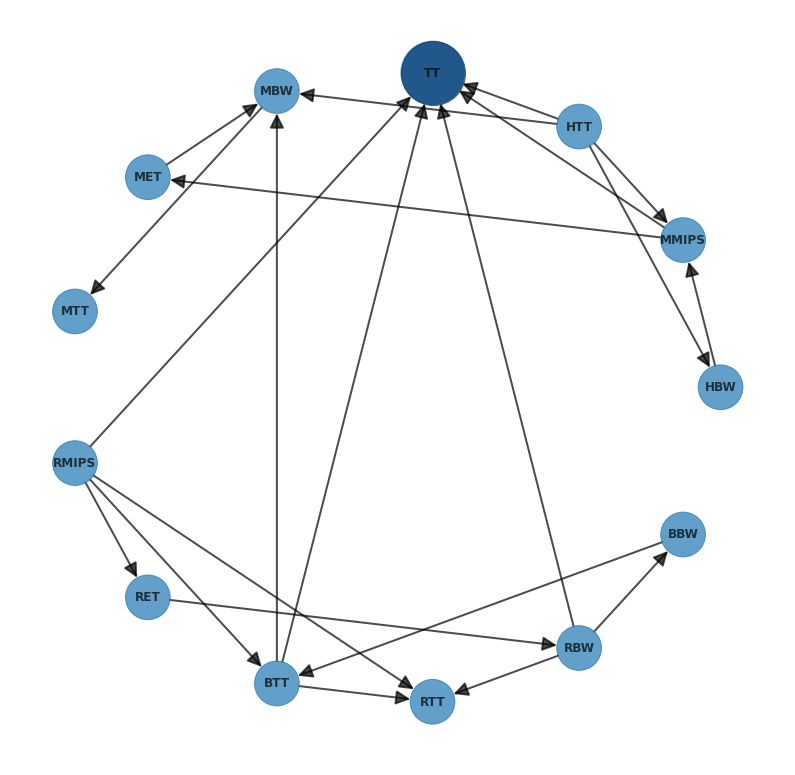

In [135]:
plt.figure(3,figsize=(14,14)) 
G = nx.DiGraph()
G.add_edges_from(model.edges)
# i = 1
# j = 1
# for node in model.nodes:
#     G.add_node(node, pos=(i, j))

#     i += 1

#     if i == 4:
#         j += 1
#         i = 1
# G.add_node('MMIPS', pos=(1, 1))
# G.add_node('MBW', pos=(2, 1))
# G.add_node('HBW', pos=(3, 1))

# G.add_node('MET', pos=(1, 2))
# G.add_node('MTT', pos=(2, 2))
# G.add_node('HTT', pos=(3, 2))

# G.add_node('BTT', pos=(1, 3))
# G.add_node('BBW', pos=(2, 3))
# G.add_node('RET', pos=(3, 3))


# G.add_node('RBW', pos=(1, 4))
# G.add_node('RTT', pos=(2, 4))
# G.add_node('RMIPS', pos=(3, 4))

# G.add_node('TT', pos=(2, 5))



# G.add_node('MMIPS', pos=(1, 3), node_size=1500)
# G.add_node('MTT', pos=(4, 5))
# G.add_node('HBW', pos=(5, 3))

# G.add_node('BTT', pos=(4, 4))
# G.add_node('MBW', pos=(2, 4))
# G.add_node('RET', pos=(7, 4))


# G.add_node('RTT', pos=(7, 3))
# G.add_node('BBW', pos=(3, 3))

# G.add_node('MET', pos=(0, 2))
# G.add_node('RBW', pos=(2, 2))
# G.add_node('HTT', pos=(4, 2))
# G.add_node('RMIPS', pos=(6, 2))

# G.add_node('TT', pos=(3, 1))


G.add_nodes_from(model.nodes)
#G.add_node(model.nodes.get('HBW'))
pos = nx.circular_layout(G)
DAG = G.to_directed()
nx.topological_sort(DAG)

#pos=nx.get_node_attributes(G, 'pos')

nx.draw_networkx(G,
                pos=pos,
                with_labels=True,
                node_size=[2000,2000,2000,4000,2000,2000,2000,2000,2000,2000,2000,2000,2000],
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

tt_g = G.subgraph(nodes=['TT'])
nx.draw(tt_g, pos=pos, with_labels=False, arrowsize=0, node_size=4100, alpha=0.7, font_weight="bold", node_color='#063970')

# sub_g = G.subgraph(nodes=['MET', 'HTT', 'RBW', 'RMIPS'])
# nx.draw(sub_g, pos=pos, with_labels=False, arrowsize=0, node_size=1400, alpha=0.7, font_weight="bold", node_color='#FFA500')  # Draw the original graph


plt.show()

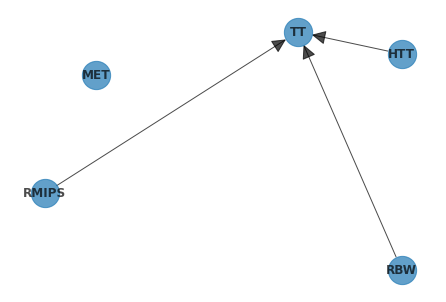

In [136]:
sub_g = G.subgraph(nodes=['MET', 'HTT', 'RBW', 'RMIPS', 'TT'])
nx.draw(sub_g, pos=pos, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")  # Draw the original graph
plt.show()

In [137]:
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)
    
    # if len(testing_data[column].unique()) == 2:
    #     precision = precision_score(testing_data[column], y_pred, pos_label='High') #pos_label=testing_data[column].unique()
    #     f1 = f1_score(testing_data[column], y_pred, pos_label='High')
    #     recall = recall_score(testing_data[column], y_pred, pos_label='High')

    # else:
    #     precision = precision_score(testing_data[column], y_pred, average='micro') #pos_label=testing_data[column].unique()
    #     f1 = f1_score(testing_data[column], y_pred, average='micro')
    #     recall = recall_score(testing_data[column], y_pred, average='micro')

    #print(f'{column} F1 score: {f1}')
    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy
    #print(f'{column} Precision score: {precision}')
    #print(f'{column} Recall score: {recall}')

  0%|          | 0/214 [00:00<?, ?it/s]

HBW Accuracy score: 0.9940944881889764


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

HTT Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

MMIPS Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

MET Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/178 [00:00<?, ?it/s]

MBW Accuracy score: 0.8799212598425197


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/179 [00:00<?, ?it/s]

MTT Accuracy score: 0.8799212598425197


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/189 [00:00<?, ?it/s]

RMIPS Accuracy score: 0.8917322834645669


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

RET Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

RBW Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/199 [00:00<?, ?it/s]

RTT Accuracy score: 0.8917322834645669


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/217 [00:00<?, ?it/s]

BBW Accuracy score: 1.0


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/212 [00:00<?, ?it/s]

BTT Accuracy score: 0.984251968503937


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/189 [00:00<?, ?it/s]

TT Accuracy score: 0.8740157480314961


c:\Python310\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


## Scoring the model

#### Run scoring functions on the model to collect metrics of correctness

In [138]:
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Structure score: {ss}')

print(model.name)

F1 score: 0.8979591836734694
Accuracy score: 0.9358974358974359
Precision score: 0.9166666666666666
Recall score: 0.88
Log-likilihood score: -2836.876954214571
Structure score: -3229.82413362336



In [139]:
def store_metrics(metrics_file_name, model_name, f1, accuracy, precision, recall, log_likelihood_score, structure_score, accuracy_dict):
    try: 
        df = pd.read_csv('Model-metrics.csv', header=0, index_col=False)
    except:
        df_columns = ['Model', 'F1', 'Accuracy', 'Precision', 'Recall', 'Log likelihood score', 'Structure score']

        df = pd.DataFrame(columns=df_columns)

    else:
        df = df[df.Model != model_name]
        
    conv_dict = {}
    for k, v in accuracy_dict.items():
        conv_dict[k] = v*100
    
    new_row = {'Model': model_name, 'F1': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Log likelihood score': log_likelihood_score, 'Structure score': structure_score,
    'HBW prediction accuracy': conv_dict['HBW'], 'HTT prediction accuracy': conv_dict['HTT'], 'MMIPS prediction accuracy': conv_dict['MMIPS'], 'MET prediction accuracy': conv_dict['MET'],
    'MBW prediction accuracy': conv_dict['MBW'], 'MTT prediction accuracy': conv_dict['MTT'], 'RMIPS prediction accuracy': conv_dict['RMIPS'], 'RET prediction accuracy': conv_dict['RET'],
    'RBW prediction accuracy': conv_dict['RBW'], 'RTT prediction accuracy': conv_dict['RTT'], 'BBW prediction accuracy': conv_dict['BBW'], 'BTT prediction accuracy': conv_dict['BTT'],
    'TT prediction accuracy': conv_dict['TT']}

    df = df.append(new_row, ignore_index=True)

    # Write to file
    df.to_csv(metrics_file_name, index=False)

In [140]:
model_name = 'Score-based CBN'
metrics_file_name = 'Model-metrics.csv'

store_metrics(metrics_file_name=metrics_file_name, model_name=model_name, f1=f1, accuracy=acc, precision=pr, recall=recall, log_likelihood_score=ls, structure_score=ss, accuracy_dict=accuracy_dict)

C:\Users\KEIRMC~1\AppData\Local\Temp/ipykernel_25688/2438977843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [141]:
# Initializing the VariableElimination class

from pgmpy.inference import VariableElimination
from pgmpy.inference.ExactInference import BeliefPropagation

bigPerf_infer = VariableElimination(model=model)

In [142]:
# Compute probabilities of parent variables of TT when TT is Very Low
q_tt = bigPerf_infer.query(variables=['HTT', 'MET', 'RBW', 'RMIPS'], evidence={'TT': 'Very Low'}, joint=False)

#print(query)
for factor in q_tt.values():
    print(factor)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+------------+
| HTT       |   phi(HTT) |
+===========+============+
| HTT(High) |     0.2662 |
+-----------+------------+
| HTT(Low)  |     0.7338 |
+-----------+------------+
+----------------+------------+
| MET            |   phi(MET) |
+================+============+
| MET(High)      |     0.1409 |
+----------------+------------+
| MET(Low)       |     0.3399 |
+----------------+------------+
| MET(Very Low)  |     0.4650 |
+----------------+------------+
| MET(Very-high) |     0.0541 |
+----------------+------------+
+-------------+------------+
| RBW         |   phi(RBW) |
+=============+============+
| RBW(High)   |     0.4125 |
+-------------+------------+
| RBW(Low)    |     0.1460 |
+-------------+------------+
| RBW(Medium) |     0.4415 |
+-------------+------------+
+---------------+--------------+
| RMIPS         |   phi(RMIPS) |
+===============+==============+
| RMIPS(High)   |       0.0011 |
+---------------+--------------+
| RMIPS(Low)    |       0.9559 |


In [143]:
# Compute probabilities of parent variables of TT when TT is Very Low
q_tt_worst = bigPerf_infer.query(variables=['HTT', 'MET', 'RBW', 'RMIPS'], evidence={'TT': 'Very-high'}, joint=False)

#print(query)
for factor in q_tt_worst.values():
    print(factor)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------+------------+
| HTT       |   phi(HTT) |
+===========+============+
| HTT(High) |     0.6178 |
+-----------+------------+
| HTT(Low)  |     0.3822 |
+-----------+------------+
+----------------+------------+
| MET            |   phi(MET) |
+================+============+
| MET(High)      |     0.3407 |
+----------------+------------+
| MET(Low)       |     0.1354 |
+----------------+------------+
| MET(Very Low)  |     0.0113 |
+----------------+------------+
| MET(Very-high) |     0.5126 |
+----------------+------------+
+-------------+------------+
| RBW         |   phi(RBW) |
+=============+============+
| RBW(High)   |     0.0014 |
+-------------+------------+
| RBW(Low)    |     0.9704 |
+-------------+------------+
| RBW(Medium) |     0.0282 |
+-------------+------------+
+---------------+--------------+
| RMIPS         |   phi(RMIPS) |
+===============+==============+
| RMIPS(High)   |       0.4110 |
+---------------+--------------+
| RMIPS(Low)    |       0.0670 |


In [144]:
q_ret_best = bigPerf_infer.query(variables=['RMIPS'], evidence={'RET': 'Low'}, joint=False)

#print(query)
for factor in q_ret_best.values():
    print(factor)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------------+--------------+
| RMIPS         |   phi(RMIPS) |
+===============+==============+
| RMIPS(High)   |       0.0008 |
+---------------+--------------+
| RMIPS(Low)    |       0.9984 |
+---------------+--------------+
| RMIPS(Medium) |       0.0008 |
+---------------+--------------+


In [145]:
q_ret_worst = bigPerf_infer.query(variables=['RMIPS'], evidence={'RET': 'High'}, joint=False)

#print(query)
for factor in q_ret_worst.values():
    print(factor)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------------+--------------+
| RMIPS         |   phi(RMIPS) |
+===============+==============+
| RMIPS(High)   |       0.3986 |
+---------------+--------------+
| RMIPS(Low)    |       0.0008 |
+---------------+--------------+
| RMIPS(Medium) |       0.6005 |
+---------------+--------------+


In [146]:
q_met_best = bigPerf_infer.query(variables=['MMIPS'], evidence={'MET': 'Low'}, joint=False)

for factor in q_met_best.values():
    print(factor)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------------+--------------+
| MMIPS            |   phi(MMIPS) |
+==================+==============+
| MMIPS(High)      |       0.0006 |
+------------------+--------------+
| MMIPS(Low)       |       0.9982 |
+------------------+--------------+
| MMIPS(Very Low)  |       0.0006 |
+------------------+--------------+
| MMIPS(Very-high) |       0.0006 |
+------------------+--------------+


In [ ]:
q_met_worst = bigPerf_infer.query(variables=['MMIPS', 'MTT', 'HBW', 'MBW', 'HTT', 'BTT'], evidence={'MET': '4'}, joint=False)

for factor in q_met_worst.values():
    print(factor)

#### Print the model's probability distributions

In [ ]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')